<a href="https://colab.research.google.com/github/hisfreshness/py/blob/master/DM_CIA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pr
key=""

In [ ]:
 df = pr.get_data_tiingo('NTRS', api_key='f01d84b8b98d037af34648845cf56bcf602afd44')


In [ ]:
 df.to_csv('NTRS.csv')

In [ ]:
import pandas as pd
x = pd.read_csv('NTRS.csv')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler(feature_range=(0,1))



In [ ]:
x


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NTRS,2016-01-06 00:00:00+00:00,69.01,69.580,68.6900,69.19,1186560,61.172258,61.677521,60.888602,61.331815,1186560,0.0,1.0
1,NTRS,2016-01-07 00:00:00+00:00,67.18,68.200,66.8100,67.37,1355254,59.550098,60.454253,59.222121,59.718519,1355254,0.0,1.0
2,NTRS,2016-01-08 00:00:00+00:00,65.93,68.010,65.8400,68.01,1275322,58.442066,60.285832,58.362288,60.285832,1275322,0.0,1.0
3,NTRS,2016-01-11 00:00:00+00:00,65.89,67.595,65.1237,66.68,1148881,58.406609,59.917965,57.727341,59.106885,1148881,0.0,1.0
4,NTRS,2016-01-12 00:00:00+00:00,66.31,66.830,65.3300,66.77,1332653,58.778908,59.239849,57.910210,59.186664,1332653,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,NTRS,2020-12-24 00:00:00+00:00,91.59,92.230,90.1800,92.23,269320,91.590000,92.230000,90.180000,92.230000,269320,0.0,1.0
1253,NTRS,2020-12-28 00:00:00+00:00,92.48,93.595,91.8300,92.09,626080,92.480000,93.595000,91.830000,92.090000,626080,0.0,1.0
1254,NTRS,2020-12-29 00:00:00+00:00,91.91,92.850,91.4356,92.84,500542,91.910000,92.850000,91.435600,92.840000,500542,0.0,1.0
1255,NTRS,2020-12-30 00:00:00+00:00,91.92,92.840,91.0705,91.61,385780,91.920000,92.840000,91.070500,91.610000,385780,0.0,1.0


In [ ]:
x1= x.reset_index()['close']

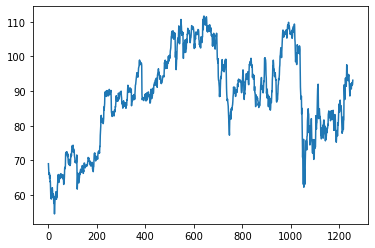

In [ ]:
x1.shape
plt.plot(x1)

In [ ]:
x1= scale.fit_transform(np.array(x1).reshape(-1,1))

In [ ]:
x1

array([[0.25398215],
       [0.22194994],
       [0.20007002],
       ...,
       [0.65482234],
       [0.65499737],
       [0.67635218]])

In [ ]:
##splitting dataset into train and test data as it a time series it is divided in 2 halves 65% and 35%
training_size=int(len(x1)*0.65)
test_size=len(x1)-training_size
train,test=x1[0:training_size,:],x1[training_size:len(x1),:1]

In [ ]:
len(test),len(train)

(440, 817)

In [ ]:
#Creating a time step split  for the data
def time_split(data, time_step=1):
	X, Y = [], []
	for i in range(len(data)-time_step-1):
		a = data[i:(i+time_step), 0] 
		X.append(a)
		Y.append(data[i + time_step, 0])
	return np.array(X), np.array(Y)

In [ ]:
#fitting the data 
time_step = 100
X_train, y_train = time_split(train, time_step)
X_test, ytest = time_split(test, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be as the LSTM requires3 dimensions [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 291ms/step - loss: 0.2762 - val_loss: 0.0158
Epoch 2/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0172 - val_loss: 0.0232
Epoch 3/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0099 - val_loss: 0.0141
Epoch 4/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0072 - val_loss: 0.0128
Epoch 5/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0053 - val_loss: 0.0135
Epoch 6/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0045 - val_loss: 0.0121
Epoch 7/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0043 - val_loss: 0.0119
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0040 - val_loss: 0.0119
Epoch 9/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0043 - val_loss: 0.0119
Epoch 10/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0039 - val_lo

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.4.0'

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
#getting back the original values
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [49]:
#Calculating the performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.031564609959846654

In [51]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.049436629239366675

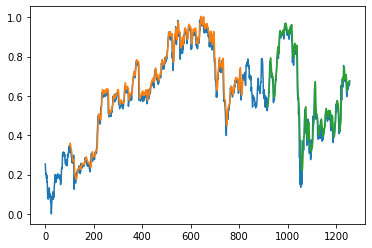

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(x1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(x1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(x1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(x1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test),len(train)

(440, 817)

In [56]:
#as input for the next 30 days
input=test[340:].reshape(1,-1)
input.shape

(1, 100)

In [58]:
#conversion to a list
temp=list(input)
temp=temp[0].tolist()
temp

[0.5210922457552949,
 0.5175914580780676,
 0.49273586556975335,
 0.5062138981270787,
 0.49151058988272367,
 0.4852091720637144,
 0.4988622440049013,
 0.47138106073866637,
 0.4766322422545075,
 0.5209172063714338,
 0.5163661823910382,
 0.49431122002450545,
 0.5212672851391564,
 0.5147908279362856,
 0.4794328723962893,
 0.48275862068965525,
 0.5149658673201472,
 0.5104148433397515,
 0.5242429546647998,
 0.474531769648171,
 0.4654297216873797,
 0.42272011202520576,
 0.4437248380885699,
 0.455102398039559,
 0.42464554524768094,
 0.5027131104498512,
 0.49711185016628767,
 0.4768072816383686,
 0.43759845965342214,
 0.40766672501312806,
 0.37615963591808166,
 0.3626816033607563,
 0.3843864869595659,
 0.42201995448976026,
 0.40189042534570274,
 0.4108174339226327,
 0.39471381060738664,
 0.41851916681253276,
 0.4608786977069841,
 0.4496761771398565,
 0.48555925083143703,
 0.5207421669875723,
 0.5377209872221251,
 0.5568002800630143,
 0.5151409067040087,
 0.5231927183616314,
 0.5692280763171713,

In [60]:
# prediction for next 30 days
from numpy import array

output1=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        #print(temp)
        input=np.array(temp[1:])
        print("{} day input {}".format(i,input))
        input=input.reshape(1,-1)
        input = input.reshape((1, n_steps, 1))
        #print(input)
        yhat = model.predict(input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp=temp[1:]
        #print(temp)
        output1.extend(yhat.tolist())
        i=i+1
    else:
        input = input.reshape((1, n_steps,1))
        yhat = model.predict(input, verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(input))
        output1.extend(yhat.tolist())
        i=i+1
        print(output1)

[0.68249947]
1
[[0.6824994683265686]]
1 day input [0.51759146 0.49273587 0.5062139  0.49151059 0.48520917 0.49886224
 0.47138106 0.47663224 0.52091721 0.51636618 0.49431122 0.52126729
 0.51479083 0.47943287 0.48275862 0.51496587 0.51041484 0.52424295
 0.47453177 0.46542972 0.42272011 0.44372484 0.4551024  0.42464555
 0.50271311 0.49711185 0.47680728 0.43759846 0.40766673 0.37615964
 0.3626816  0.38438649 0.42201995 0.40189043 0.41081743 0.39471381
 0.41851917 0.4608787  0.44967618 0.48555925 0.52074217 0.53772099
 0.55680028 0.51514091 0.52319272 0.56922808 0.57552949 0.54104674
 0.54717311 0.54734815 0.54717311 0.5235428  0.48538421 0.45860319
 0.40784176 0.41641869 0.41606862 0.42972169 0.49081043 0.42692106
 0.47400665 0.47540697 0.63539296 0.6537721  0.6075617  0.57885524
 0.63539296 0.67635218 0.68772974 0.66847541 0.68020305 0.64572029
 0.68370383 0.75459478 0.74181691 0.72886399 0.6760021  0.67862769
 0.68965517 0.67372659 0.70558376 0.69875722 0.70243305 0.67775249
 0.65149659 

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
len(x1)

1257

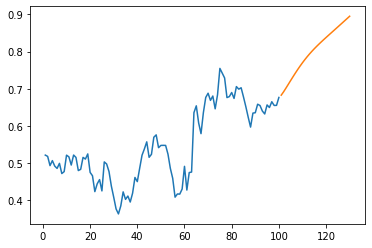

In [64]:
plt.plot(day_new,scale.inverse_transform(x1[1157:]))
plt.plot(day_pred,scale.inverse_transform(output1))